In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [310]:
df = pd.read_excel("default of credit card clients.xls", header=1, index_col=0)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [100]:
mindf = df.min(skipna = False)
mindf

LIMIT_BAL                      10000
SEX                                1
EDUCATION                          0
MARRIAGE                           0
AGE                               21
PAY_0                             -2
PAY_2                             -2
PAY_3                             -2
PAY_4                             -2
PAY_5                             -2
PAY_6                             -2
BILL_AMT1                    -165580
BILL_AMT2                     -69777
BILL_AMT3                    -157264
BILL_AMT4                    -170000
BILL_AMT5                     -81334
BILL_AMT6                    -339603
PAY_AMT1                           0
PAY_AMT2                           0
PAY_AMT3                           0
PAY_AMT4                           0
PAY_AMT5                           0
PAY_AMT6                           0
default payment next month         0
dtype: int64

In [101]:
maxdf = df.max(skipna = False)
maxdf

LIMIT_BAL                     1000000
SEX                                 2
EDUCATION                           6
MARRIAGE                            3
AGE                                79
PAY_0                               8
PAY_2                               8
PAY_3                               8
PAY_4                               8
PAY_5                               8
PAY_6                               8
BILL_AMT1                      964511
BILL_AMT2                      983931
BILL_AMT3                     1664089
BILL_AMT4                      891586
BILL_AMT5                      927171
BILL_AMT6                      961664
PAY_AMT1                       873552
PAY_AMT2                      1684259
PAY_AMT3                       896040
PAY_AMT4                       621000
PAY_AMT5                       426529
PAY_AMT6                       528666
default payment next month          1
dtype: int64

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

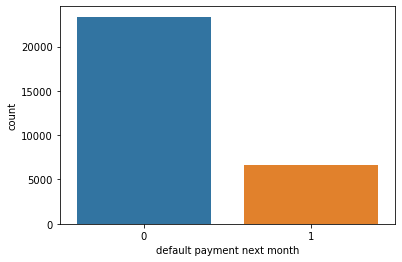

In [102]:
sns.countplot(x = 'default payment next month', data=df)

In [103]:
df.shape
df.iloc[:,:23]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [16]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(df.iloc[:,:23], df['default payment next month'])

<AxesSubplot:>

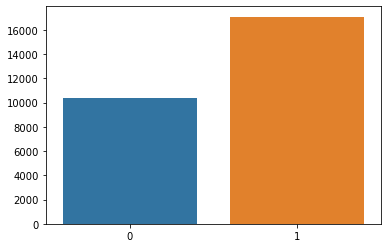

In [47]:
sns.barplot(x=[0,1],y=np.bincount(y_resampled))

In [ ]:
X_resampled, y_resampled = smote_enn.fit_resample(df.iloc[:,:23], df['default payment next month'])

In [48]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=43)

In [86]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[1,2,3,5,6,7,8,9,10])
X_res, y_res = sm.fit_resample(df.iloc[:,:23], df['default payment next month'])

<AxesSubplot:>

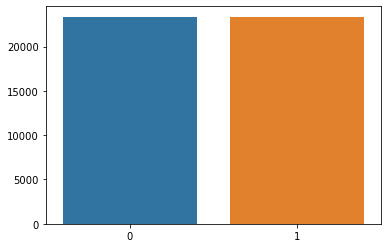

In [87]:
sns.barplot(x=[0,1],y=np.bincount(y_res))

# Scale everything

In [187]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_res)


In [192]:
X_scale_torch = torch.FloatTensor(X_scale)
y_scale_torch = torch.FloatTensor(y_res)
y_scale_torch

tensor([1., 1., 0.,  ..., 1., 1., 1.])

In [279]:
from skorch import NeuralNetBinaryClassifier
from classes import MyModule
class toTensor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return torch.FloatTensor(X)
class MyModule(nn.Module):
    def __init__(self, num_units=128, dropoutrate = 0.5):
        super(MyModule, self).__init__()
        self.dropoutrate = dropoutrate
        self.layer1 = nn.Linear(23, num_units)
        self.nonlin = nn.ReLU()
        self.dropout1 = nn.Dropout(self.dropoutrate)
        self.dropout2 = nn.Dropout(self.dropoutrate)
        self.layer2 = nn.Linear(num_units, num_units)
        self.output = nn.Linear(num_units,1)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(128)

    def forward(self, X, **kwargs):
        X = self.nonlin(self.layer1(X))
        X = self.batchnorm1(X)
        X = self.dropout1(X)
        X = self.nonlin(self.layer2(X))
        X = self.batchnorm2(X)
        X = self.dropout2(X)
        X = self.output(X)
        return X

model = NeuralNetBinaryClassifier(
    MyModule(dropoutrate = 0.2),
    max_epochs=40,
    lr=0.01,
    batch_size=128,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)


In [311]:
model.fit(X_scale_torch, y_scale_torch)

Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5481       0.6897        0.5846  1.6928
      2        0.5493       0.6884        0.5853  1.5468
      3        0.5474       0.6857        0.5868  1.5793
      4        0.5481       0.6899        0.5827  1.8644
      5        0.5481       0.6930        0.5826  1.8235
      6        0.5475       0.6849        0.5842  1.8484
      7        0.5448       0.6930        0.5825  1.7220
      8        0.5470       0.6921        0.5852  1.7885
      9        0.5430       0.6868        0.5868  1.6701
     10        0.5454       0.6913        0.5839  1.7286
     11        0.5441       0.6882        0.5863  1.7842
     12        0.5450       0.6854        0.5829  1.8867
     13        0.5448       0.6895        0.5841  1.7885
     14        0.5441       0.6940        0.5830  1.7386
     15   

<class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=MyModule(
    (layer1): Linear(in_features=23, out_features=128, bias=True)
    (nonlin): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (dropout2): Dropout(p=0.2, inplace=False)
    (layer2): Linear(in_features=128, out_features=128, bias=True)
    (output): Linear(in_features=128, out_features=1, bias=True)
    (batchnorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  ),
)

<AxesSubplot:xlabel='epoch'>

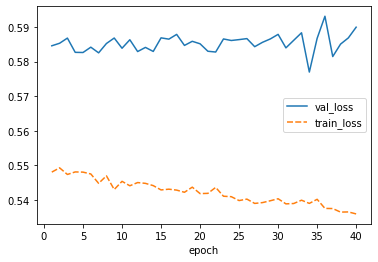

In [312]:
val_loss = []
train_loss = []
epochs = range(1,41)
for i in range(40):
    val_loss.append(model.history[i]['valid_loss'])
    train_loss.append(model.history[i]['train_loss'])
dfloss = (pd.DataFrame({'epoch': epochs, 'val_loss': val_loss, 'train_loss': train_loss}, 
                       columns=['epoch', 'val_loss', 'train_loss']).set_index('epoch'))
sns.lineplot(data=dfloss)
    

In [215]:
from skorch.helper import SliceDataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

train_slice = SliceDataset(X_scale_torch)
y_slice = SliceDataset(y_scale_torch)
scores = cross_validate(model, X_scale_torch, y_scale_torch, scoring='accuracy', cv=4)


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7422       0.5981        0.6681  0.8009
      2        0.7018       0.6262        0.6462  0.8059
      3        0.6801       0.6437        0.6344  0.7908
      4        0.6680       0.6437        0.6290  0.7710
      5        0.6595       0.6555        0.6214  0.7588
      6        0.6514       0.6536        0.6189  0.7778
      7        0.6447       0.6563        0.6153  0.7794
      8        0.6411       0.6585        0.6121  0.7884
      9        0.6363       0.6602        0.6110  0.7841
     10        0.6346       0.6656        0.6090  0.7597
     11        0.6308       0.6628        0.6084  0.7602
     12        0.6289       0.6626        0.6086  0.7605
     13        0.6263       0.6646        0.6060  0.7634
     14        0.6229       0.6643        0.6061  0.7471
     15        0.6227       0.6622        0.6068  0.7732
     16        0.6227       0.6

     30        0.6074       0.6678        0.6100  0.8734
     31        0.6040       0.6803        0.6091  0.8685
     32        0.6059       0.6762        0.6088  0.8247
     33        0.6057       0.6825        0.6071  0.8793
     34        0.6056       0.6812        0.6074  0.7982
     35        0.6052       0.6755        0.6084  0.8113
     36        0.6043       0.6750        0.6077  0.8190
     37        0.6042       0.6756        0.6080  0.9951
     38        0.6027       0.6675        0.6081  0.8635
     39        0.6031       0.6770        0.6063  0.8387
     40        0.6025       0.6813        0.6063  0.9224
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7220       0.6123        0.6578  0.9042
      2        0.6877       0.6408        0.6447  0.8030
      3        0.6684       0.6549        0.6348  0.7630
      4        0.6585       0.6612        0.6297  0.7723
      5        0.6521       0.6

In [221]:
import functools as f
print('validation accuracy for each fold: {}'.format(scores))
#print('avg validation accuracy: {:.3f}'.format(scores.mean()))
#loop through the dictionary
for key,value in scores.items(): 
   #use reduce to calculate the avg
   print(f"Average {key}", f.reduce(lambda x, y: x + y, scores[key]) / len(scores[key]))

validation accuracy for each fold: {'fit_time': array([32.64935684, 32.56045794, 33.10055208, 30.3942039 ]), 'score_time': array([0.13864493, 0.15048194, 0.19447684, 0.137707  ]), 'test_score': array([0.68130457, 0.67582606, 0.67762369, 0.69748331])}
Average fit_time 32.17614269256592
Average score_time 0.1553276777267456
Average test_score 0.6830594076356789


In [240]:
from sklearn.model_selection import GridSearchCV
params = {
    'lr': [0.01, 0.001],
    'module__dropoutrate': [0.2, 0.5]

}
model.module

__main__.MyModule

In [241]:
gs = GridSearchCV(model, params, refit=False, cv=4, scoring='accuracy', verbose=2)
gs_results = gs.fit(X_scale_torch,y_scale_torch )

Fitting 4 folds for each of 4 candidates, totalling 16 fits
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6192       0.6536        0.6164  0.7819
      2        0.5903       0.6765        0.6009  0.7738
      3        0.5852       0.6759        0.5906  0.8328
      4        0.5790       0.6870        0.5871  0.7694
      5        0.5756       0.6670        0.5945  0.7599
      6        0.5733       0.6799        0.5873  0.7709
      7        0.5706       0.6779        0.5879  0.7603
      8        0.5687       0.6889        0.5838  0.7594
      9        0.5649       0.6926        0.5802  0.7511
     10        0.5629       0.6880        0.5808  0.7578
     11        0.5634       0.6899        0.5818  0.7553
     12        0.5617       0.6923        0.5816  0.7562
     13        0.5601       0.6867        0.5829  0.7679
     14        0.5577       0.6832        0.5830  0.7449
     15        0.5560       

     34        0.5533       0.6835        0.5962  0.7833
     35        0.5547       0.6835        0.5929  0.7953
     36        0.5556       0.6815        0.5928  0.7990
     37        0.5521       0.6820        0.5951  0.7769
     38        0.5530       0.6839        0.5938  0.7786
     39        0.5549       0.6740        0.5953  0.7836
     40        0.5545       0.6813        0.5934  0.8708
[CV] END ...................lr=0.01, module__dropoutrate=0.2; total time=  32.6s
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6352       0.6599        0.6216  0.8678
      2        0.6083       0.6616        0.6175  0.8280
      3        0.6011       0.6668        0.6138  0.8102
      4        0.5942       0.6716        0.6102  0.9634
      5        0.5897       0.6692        0.6073  1.0690
      6        0.5879       0.6662        0.6109  0.9791
      7        0.5860       0.6706        0.6062  0.9132
      8

     24        0.5829       0.6805        0.5982  0.7940
     25        0.5803       0.6826        0.5991  0.7708
     26        0.5801       0.6779        0.5998  0.7484
     27        0.5800       0.6797        0.5966  0.7650
     28        0.5802       0.6812        0.5972  0.7494
     29        0.5800       0.6809        0.5972  0.7674
     30        0.5776       0.6678        0.6026  0.7798
     31        0.5769       0.6757        0.5981  0.7464
     32        0.5784       0.6790        0.5969  0.7557
     33        0.5798       0.6796        0.5965  0.7584
     34        0.5760       0.6833        0.5966  0.7629
     35        0.5749       0.6713        0.5993  0.7537
     36        0.5757       0.6759        0.5979  0.7833
     37        0.5759       0.6748        0.5969  0.7848
     38        0.5744       0.6803        0.5972  0.7713
     39        0.5740       0.6755        0.5976  0.7945
     40        0.5764       0.6783        0.5982  0.7928
[CV] END ...................lr=

     16        0.5919       0.6789        0.5969  0.7744
     17        0.5921       0.6750        0.5979  0.7535
     18        0.5891       0.6782        0.5972  0.7503
     19        0.5888       0.6812        0.5962  0.7537
     20        0.5890       0.6800        0.5949  0.7462
     21        0.5873       0.6769        0.5972  0.7630
     22        0.5875       0.6816        0.5952  0.7528
     23        0.5864       0.6809        0.5948  0.7519
     24        0.5853       0.6816        0.5940  0.7558
     25        0.5861       0.6846        0.5951  0.7514
     26        0.5832       0.6796        0.5947  0.7530
     27        0.5820       0.6840        0.5918  0.7507
     28        0.5832       0.6806        0.5935  0.7534
     29        0.5851       0.6806        0.5933  0.7550
     30        0.5815       0.6827        0.5917  0.7549
     31        0.5817       0.6817        0.5921  0.7472
     32        0.5824       0.6850        0.5908  0.7486
     33        0.5800       0.6

      5        0.6261       0.6588        0.6240  0.7691
      6        0.6200       0.6558        0.6218  0.7820
      7        0.6150       0.6693        0.6175  0.7582
      8        0.6114       0.6665        0.6167  0.7510
      9        0.6088       0.6760        0.6167  0.7561
     10        0.6070       0.6685        0.6150  0.7577
     11        0.6017       0.6753        0.6143  0.7569
     12        0.6024       0.6730        0.6128  0.8639
     13        0.6022       0.6769        0.6116  0.8370
     14        0.6007       0.6770        0.6134  0.8612
     15        0.6006       0.6776        0.6115  0.7700
     16        0.5968       0.6767        0.6130  0.7477
     17        0.5955       0.6762        0.6138  0.7454
     18        0.5988       0.6783        0.6099  0.7540
     19        0.5937       0.6757        0.6127  0.7562
     20        0.5946       0.6752        0.6116  0.7522
     21        0.5948       0.6777        0.6100  0.7503
     22        0.5928       0.6

     35        0.6074       0.6718        0.6094  0.8805
     36        0.6050       0.6760        0.6096  0.8715
     37        0.6066       0.6775        0.6091  0.7767
     38        0.6057       0.6760        0.6084  0.8565
     39        0.6049       0.6750        0.6100  0.8712
     40        0.6046       0.6816        0.6076  0.7907
[CV] END ..................lr=0.001, module__dropoutrate=0.5; total time=  31.2s
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7209       0.6126        0.6621  0.7748
      2        0.6861       0.6432        0.6442  0.7800
      3        0.6652       0.6515        0.6347  0.7692
      4        0.6543       0.6536        0.6304  0.7721
      5        0.6465       0.6585        0.6270  0.7881
      6        0.6395       0.6605        0.6238  0.7772
      7        0.6393       0.6625        0.6232  0.8046
      8        0.6344       0.6628        0.6225  0.7795
      9

In [248]:
for key in gs.cv_results_.keys():
    print(key, gs.cv_results_[key])

mean_fit_time [31.88682443 30.51245248 30.57055247 31.74798542]
std_fit_time [1.33337528 0.20746012 0.19286978 1.00132016]
mean_score_time [0.16935319 0.15622282 0.15137154 0.15740955]
std_score_time [0.00573338 0.00570575 0.00165977 0.00264987]
param_lr [0.01 0.01 0.001 0.001]
param_module__dropoutrate [0.2 0.5 0.2 0.5]
params [{'lr': 0.01, 'module__dropoutrate': 0.2}, {'lr': 0.01, 'module__dropoutrate': 0.5}, {'lr': 0.001, 'module__dropoutrate': 0.2}, {'lr': 0.001, 'module__dropoutrate': 0.5}]
split0_test_score [0.68113337 0.67599726 0.67531245 0.67719569]
split1_test_score [0.70330423 0.69149118 0.68156138 0.68130457]
split2_test_score [0.71409005 0.69003595 0.68515665 0.68224619]
split3_test_score [0.71391885 0.69928095 0.69910974 0.69637048]
mean_test_score [0.70311162 0.68920134 0.68528505 0.68427923]
std_test_score [0.01342016 0.00839473 0.00872435 0.00723458]
rank_test_score [1 2 3 4]


In [254]:
import pickle
with open('model1.pkl', 'wb') as f:
    pickle.dump(model, f)

In [255]:
model.save_params(
    f_params='model.pkl', f_optimizer='opt.pkl', f_history='history.json')


In [280]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from classes import toTensor
pipeline = Pipeline([
        ('scale', StandardScaler()),
      ('tensor',toTensor()),
      ('classification',model)
    ])
pipeline.fit(X_res, torch.FloatTensor(y_res))

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6173       0.6842        0.5973  1.0533
      2        0.5909       0.6884        0.5961  1.0349
      3        0.5853       0.6924        0.5916  1.0474
      4        0.5807       0.6900        0.5912  1.0496
      5        0.5785       0.6871        0.5928  1.0142
      6        0.5760       0.6895        0.5890  1.0178
      7        0.5734       0.6848        0.5882  1.0188
      8        0.5733       0.6831        0.5899  1.0135
      9        0.5710       0.6816        0.5954  1.0644
     10        0.5689       0.6903        0.5866  1.0293
     11        0.5670       0.6863        0.5860  1.0264
     12        0.5673       0.6886        0.5867  1.0984
     13        0.5660       0.6865        0.5859  1.0589
     14        0.5658       0.6847        0.5887  1.0605
     15        0.5648       0.6859        0.5846  1.0302
     16        0.5642       0.6

Pipeline(steps=[('scale', StandardScaler()), ('tensor', toTensor()),
                ('classification',
                 <class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=MyModule(
    (layer1): Linear(in_features=23, out_features=128, bias=True)
    (nonlin): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (dropout2): Dropout(p=0.2, inplace=False)
    (layer2): Linear(in_features=128, out_features=128, bias=True)
    (output): Linear(in_features=128, out_features=1, bias=True)
    (batchnorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  ),
))])

In [281]:
import joblib

with open('model1.pkl', 'wb') as f:
    joblib.dump(pipeline,f)

In [320]:
jinput = X_res.iloc[15].to_json()
jinput

'{"LIMIT_BAL":50000,"SEX":2,"EDUCATION":3,"MARRIAGE":3,"AGE":23,"PAY_0":1,"PAY_2":2,"PAY_3":0,"PAY_4":0,"PAY_5":0,"PAY_6":0,"BILL_AMT1":50614,"BILL_AMT2":29173,"BILL_AMT3":28116,"BILL_AMT4":28771,"BILL_AMT5":29531,"BILL_AMT6":30211,"PAY_AMT1":0,"PAY_AMT2":1500,"PAY_AMT3":1100,"PAY_AMT4":1200,"PAY_AMT5":1300,"PAY_AMT6":1100}'

In [ ]:
{
  "LIMIT_BAL": 20000,
  "SEX": 2,
  "EDUCATION": 2,
  "MARRIAGE": 1,
  "AGE": 24,
  "PAY_0": 2,
  "PAY_2": -1,
  "PAY_3": -1,
  "PAY_4": -1,
  "PAY_5": -2,
  "PAY_6": -2,
  "BILL_AMT1": 3913,
  "BILL_AMT2": 3102,
  "BILL_AMT3": 689,
  "BILL_AMT4": 0,
  "BILL_AMT5": 0,
  "BILL_AMT6": 0,
  "PAY_AMT1": 0,
  "PAY_AMT2": 689,
  "PAY_AMT3": 0,
  "PAY_AMT4": 0,
  "PAY_AMT5": 0,
  "PAY_AMT6": 0
}

In [316]:
import requests
bashCommand = f"""curl -X 'POST' 'http://127.0.0.1:8000/predict' -H 'accept: application/json' -H 'Content-Type: application/json' -d {jinput}"""
headers = {
    
}
res = requests.post('http://127.0.0.1:8000/predict', data=jinput, headers=headers)

In [317]:
res.text

'{"status":"SUCCESS","prediction":0}'

In [319]:
%%timeit
res = requests.post('http://127.0.0.1:8000/predict', data=jinput, headers=headers)

10.4 ms ± 538 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Embeds

In [104]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
lincolumns = (['LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
ct = ColumnTransformer([
        ('scalethis', StandardScaler(), lincolumns)
    ], remainder='passthrough')

ct2 = ct.fit_transform(df.iloc[:,:23])

In [160]:
dfct2 = pd.DataFrame(ct2)
dfct2

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,-0.293382,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,-0.180878,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,-0.012122,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,-0.237130,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,-0.255187,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,...,-0.237130,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,-0.134759,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,...,-0.293382,1.0,3.0,2.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
29997,-1.059646,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,...,-0.119001,1.0,2.0,2.0,4.0,3.0,2.0,-1.0,0.0,0.0
29998,-0.674276,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,...,-0.191904,1.0,3.0,1.0,1.0,-1.0,0.0,0.0,0.0,-1.0


In [163]:
df_numeric = dfct2.iloc[:,:14]
df_cat = dfct2.iloc[:,14:]
df_cat1 = df_cat.iloc[:,0]
df_cat2 = df_cat.iloc[:,1]
df_cat3 = df_cat.iloc[:,2]
df_cat4 = df_cat.iloc[:,3:]
df_cat4

,17,18,19,20,21,22
0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,-1.0,2.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0
29996,-1.0,-1.0,-1.0,-1.0,0.0,0.0
29997,4.0,3.0,2.0,-1.0,0.0,0.0
29998,1.0,-1.0,0.0,0.0,0.0,-1.0


In [186]:
def emb_sz_rule(n_cat): 
    return min(600, round(1.6 * n_cat**0.56))
embed = nn.Embedding(2, emb_sz_rule(2))

embed(torch.tensor(df_cat1.values).to(torch.int64))

IndexError: index out of range in self

In [ ]:
def emb_sz_rule(n_cat): 
    return min(600, round(1.6 * n_cat**0.56))
class MyModule(nn.Module):
    def __init__(self, num_inputs=23, num_units_d1=128, num_units_d2=128)):
        super(MyModule, self).__init__()
        self.dense0 = nn.Linear(20, num_units)
        self.nonlin = nonlin
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units, num_units)
        self.output = nn.Linear(num_units, 2)
        self.softmax = nn.Softmax(dim=-1)
        self.embed1 = nn.Embedding(2, emb_sz_rule(2))
        self.embed2 = nn.Embedding(7, emb_sz_rule(7))
        self.embed3 = nn.Embedding(4, emb_sz_rule(4))
        self.embed4 = nn.Embedding(11, emb_sz_rule(11))
    def forward(self, X, cat1, cat2, cat3, cat4):
        x1 = self.embed1(cat1)
        x2 = self.embed2(cat2)
        x3 = self.embed3(cat3)
        x4 = self.embed4(cat4)
        X = torch.cat((X,x1,x2,x3,x4), dim=1)
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense1(X))
        X = self.softmax(self.output(X))
        return X

model = NeuralNetBinaryClassifier(
    MyModule,
    max_epochs=40,
    lr=0.001,

    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001


In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        self.layer_1 = nn.Linear(23, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

class MyModule(nn.Module):
    def __init__(self, num_inputs=23, num_units_d1=128, num_units_d2=128)):
        super(MyModule, self).__init__()
        self.dense0 = nn.Linear(20, num_units)
        self.nonlin = nonlin
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units, num_units)
        self.output = nn.Linear(num_units, 2)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense1(X))
        X = self.softmax(self.output(X))
        return X

model = NeuralNetBinaryClassifier(
    MyModule,
    max_epochs=40,
    lr=0.001,

    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

# Py Torch

In [53]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train.to_numpy(dtype=np.float64)))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [54]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [62]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        self.layer_1 = nn.Linear(23, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [63]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [64]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=23, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [58]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [65]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.45479 | Acc: 78.439
Epoch 002: | Loss: 0.41233 | Acc: 80.850
Epoch 003: | Loss: 0.40462 | Acc: 81.488
Epoch 004: | Loss: 0.39199 | Acc: 82.028
Epoch 005: | Loss: 0.38622 | Acc: 82.199
Epoch 006: | Loss: 0.38073 | Acc: 82.523
Epoch 007: | Loss: 0.37937 | Acc: 82.760
Epoch 008: | Loss: 0.37373 | Acc: 83.192
Epoch 009: | Loss: 0.36585 | Acc: 83.111
Epoch 010: | Loss: 0.36803 | Acc: 83.328
Epoch 011: | Loss: 0.36370 | Acc: 83.610
Epoch 012: | Loss: 0.35545 | Acc: 83.979
Epoch 013: | Loss: 0.35516 | Acc: 84.031
Epoch 014: | Loss: 0.35149 | Acc: 84.261
Epoch 015: | Loss: 0.35078 | Acc: 84.237
Epoch 016: | Loss: 0.34535 | Acc: 84.415
Epoch 017: | Loss: 0.34704 | Acc: 84.495
Epoch 018: | Loss: 0.34282 | Acc: 84.679
Epoch 019: | Loss: 0.34274 | Acc: 84.491
Epoch 020: | Loss: 0.33811 | Acc: 85.070
Epoch 021: | Loss: 0.33696 | Acc: 84.927
Epoch 022: | Loss: 0.33600 | Acc: 84.868
Epoch 023: | Loss: 0.33675 | Acc: 85.223
Epoch 024: | Loss: 0.33064 | Acc: 85.334
Epoch 025: | Los

In [66]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [67]:
confusion_matrix(y_test, y_pred_list)

array([[2518,  939],
       [ 575, 5015]])

In [68]:
print(classification_report(y_test, y_pred_list))


              precision    recall  f1-score   support

           0       0.81      0.73      0.77      3457
           1       0.84      0.90      0.87      5590

    accuracy                           0.83      9047
   macro avg       0.83      0.81      0.82      9047
weighted avg       0.83      0.83      0.83      9047



In [69]:
# use the original data

In [72]:
scaler = StandardScaler()
X_og = scaler.fit_transform(df.iloc[:,:23])
X_og

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [80]:
og_data = TestData(torch.FloatTensor(X_og))
og_loader = DataLoader(dataset=og_data, batch_size=1)
og_y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in og_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        og_y_pred_list.append(y_pred_tag.cpu().numpy())

og_y_pred_list = [a.squeeze().tolist() for a in og_y_pred_list]

In [82]:
confusion_matrix(df['default payment next month'].to_numpy(dtype=np.float64), og_y_pred_list)

array([[ 7698, 15666],
       [  660,  5976]])

In [83]:
print(classification_report(df['default payment next month'].to_numpy(dtype=np.float64), og_y_pred_list))

              precision    recall  f1-score   support

         0.0       0.92      0.33      0.49     23364
         1.0       0.28      0.90      0.42      6636

    accuracy                           0.46     30000
   macro avg       0.60      0.62      0.45     30000
weighted avg       0.78      0.46      0.47     30000



In [84]:
torch.save(model.state_dict(), "model1.pt")

In [85]:
https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89

SyntaxError: invalid syntax (2841653707.py, line 1)